In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
user_groups = pd.read_csv('class.csv') 

In [3]:
user_groups

,user,group
0,u1111,g00001
1,u1112,g00001
2,u1113,g00001
3,u1112,g00002
4,u1111,g00002
5,u1111,g00003
6,u1113,g00003
7,u1111,g00004
8,u1114,g00003
9,u1115,g00002


In [4]:
groups_dict = user_groups.groupby('user')['group'].apply(list).to_dict()

In [5]:
groups_dict

{'u1111': ['g00001', 'g00002', 'g00003', 'g00004', 'g00005', 'g00006'],
 'u1112': ['g00001', 'g00002', 'g00001', 'g00002'],
 'u1113': ['g00001', 'g00003', 'g00006', 'g00002', 'g00004'],
 'u1114': ['g00003', 'g00002'],
 'u1115': ['g00002', 'g00001'],
 'u1116': ['g00004', 'g00002', 'g00009'],
 'u1117': ['g00009', 'g00004'],
 'u1118': ['g00008'],
 'u1119': ['g00008']}

In [6]:
G = nx.Graph()
edges_dict = {}

for user_id, groups in groups_dict.items():
    G.add_node(user_id)
    for group in groups:
        for user_id_2, groups_2 in groups_dict.items():
            if group in groups_2:
                if user_id != user_id_2:
                    G.add_edge(user_id, user_id_2)
                    id_tuple = tuple(sorted((user_id, user_id_2)))
                    if id_tuple not in edges_dict:
                        edges_dict[id_tuple] = 1
                    else:
                        edges_dict[id_tuple] += 1

In [7]:
edges_dict

{('u1111', 'u1112'): 6,
 ('u1111', 'u1113'): 10,
 ('u1111', 'u1115'): 4,
 ('u1111', 'u1114'): 4,
 ('u1111', 'u1116'): 4,
 ('u1111', 'u1117'): 2,
 ('u1112', 'u1113'): 6,
 ('u1112', 'u1115'): 6,
 ('u1112', 'u1114'): 3,
 ('u1112', 'u1116'): 3,
 ('u1113', 'u1115'): 4,
 ('u1113', 'u1114'): 4,
 ('u1113', 'u1116'): 4,
 ('u1113', 'u1117'): 2,
 ('u1114', 'u1115'): 2,
 ('u1114', 'u1116'): 2,
 ('u1115', 'u1116'): 2,
 ('u1116', 'u1117'): 4,
 ('u1118', 'u1119'): 2}

Para que o networkx leia os pesos, reformatei os valores dos pesos em edges_dict e defini os pesos no grafo usando .set_edge_attributes() 

In [8]:
for k,v in edges_dict.items():
    edges_dict[k] = {'weight':v}

In [9]:
edges_dict

{('u1111', 'u1112'): {'weight': 6},
 ('u1111', 'u1113'): {'weight': 10},
 ('u1111', 'u1115'): {'weight': 4},
 ('u1111', 'u1114'): {'weight': 4},
 ('u1111', 'u1116'): {'weight': 4},
 ('u1111', 'u1117'): {'weight': 2},
 ('u1112', 'u1113'): {'weight': 6},
 ('u1112', 'u1115'): {'weight': 6},
 ('u1112', 'u1114'): {'weight': 3},
 ('u1112', 'u1116'): {'weight': 3},
 ('u1113', 'u1115'): {'weight': 4},
 ('u1113', 'u1114'): {'weight': 4},
 ('u1113', 'u1116'): {'weight': 4},
 ('u1113', 'u1117'): {'weight': 2},
 ('u1114', 'u1115'): {'weight': 2},
 ('u1114', 'u1116'): {'weight': 2},
 ('u1115', 'u1116'): {'weight': 2},
 ('u1116', 'u1117'): {'weight': 4},
 ('u1118', 'u1119'): {'weight': 2}}

In [11]:
nx.set_edge_attributes(G, edges_dict)

## Métricas

Com o grafo carregado na memória, podemos começar a rodar análises de métricas de centralidade, como as centralidades de grau (quantos vizinhos os nós têm), eigenvector (nós interconectados de maior prestígio), proximidade (o quão próximo um vértice é dos outros) e intermediação (fração de todas as possíveis geodésicas que passam pelos nós).

No entanto, o conjunto de dados consta com um número grande de nós e vértices. É possível conferir isso com os métodos number_of_nodes e number_of_edges:


In [12]:
G.number_of_edges()

19

In [13]:
G.number_of_nodes()

9

Com muitos nós e, demoraria um longo tempo para executar as métricas. Por este motivo, iremos apenas filtrar os vértices com os maiores números de vizinhos, visto que a métrica de grau é a mais rápida de se executar.

In [14]:
deg_cen = nx.degree_centrality(G)

In [34]:
nodes = sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]
nodes_keys = []
for node in nodes:
    nodes_keys.append(node[0])

In [35]:
nodes_keys

['u1111', 'u1113', 'u1116', 'u1112', 'u1115']

In [36]:
H = G.subgraph(nodes_keys)
H.nodes

NodeView(('u1111', 'u1112', 'u1113', 'u1115', 'u1116'))

Agora que selecionamos os  cinco nós com maior número de vizinhos, iremos pegar as métricas de intermediação, eigenvector, proximidade e, como um bônus, a métrica de clustering, que indica a fração de possíveis triângulos em todos os nós, com os métodos betweenness_centrality, eigenvector_centrality, closeness_centrality e clustering, respectivamente.


In [37]:
cen_btw = nx.betweenness_centrality(H)
cen_ei = nx.eigenvector_centrality(H)
cen_clos = nx.closeness_centrality(H)
cc = nx.clustering(H)

Para facilitar a plotagem, adicionaremos as métricas como atributos dos nós.

In [38]:
for v in H.nodes():
    node = H.nodes[v]
    node['degree'] = deg_cen[v]
    node['betweeness'] = cen_btw[v]
    node['eigenvector'] = cen_ei[v]
    node['closeness'] = cen_clos[v]
    node['clustering'] = float(cc[v])

In [39]:
H.nodes['u1111']['betweeness']


0.0

## Mais sobre as medidas

### Centralidade de Grau

Numa rede social, uma medida que chama atenção é a quantidade de amigos que uma pessoa possui. A centralidade de grau é justamente baseada no número de arestas que o nó possui, sendo a medida de centralidade mais básica.

"Um nó importante está conectado com muitos nós"

In [45]:
centralidade = nx.degree_centrality(G)
centralidade

{'u1111': 0.75,
 'u1112': 0.625,
 'u1113': 0.75,
 'u1115': 0.625,
 'u1114': 0.625,
 'u1116': 0.75,
 'u1117': 0.375,
 'u1118': 0.125,
 'u1119': 0.125}

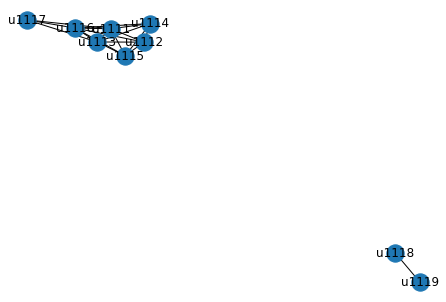

In [46]:
# exibindo o grafo
nx.draw(G, with_labels=True)

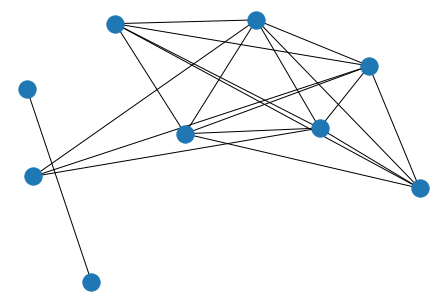

In [49]:
pos = nx.spring_layout(G, k=1, iterations=5)
max_c = max(centralidade.values())
nx.draw(G, pos)
plt.show()

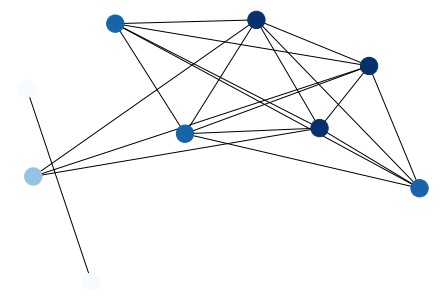

In [50]:
# with colormap
color_map = {x[0]:x[1]/max_c for x in centralidade.items()}
nx.draw(G, pos, node_color=list(color_map.values()), cmap=plt.cm.Blues)
plt.show()

### Centralidade de Proximidade (Closeness)

Em vários contextos, mais importante que ter muitas conexões é não estar longe demais dos outros nós.

"Um nó importante está próximo dos outros nós"

In [51]:
centralidade_close = nx.closeness_centrality(G, distance='weight')
centralidade_close

{'u1111': 0.1875,
 'u1112': 0.15000000000000002,
 'u1113': 0.1875,
 'u1115': 0.19565217391304346,
 'u1114': 0.21428571428571427,
 'u1116': 0.23684210526315788,
 'u1117': 0.16666666666666666,
 'u1118': 0.0625,
 'u1119': 0.0625}

In [52]:
pos = nx.spring_layout(g, k=1, iterations=5)
max_c = max(centralidade_close.values())
color_map = {x[0]:x[1]/max_c for x in centralidade_close.items()}
nx.draw(G, pos, node_color=list(color_map.values()), cmap=plt.cm.Blues)
plt.show()

NameError: name 'g' is not defined

A última métrica de centralidade que calculei e exibi foi a centralidade entre os nós, que, para cada nó, é o número de caminhos mais curtos que passam pelo nó. Isso indica quais usuarios servem como pontes mais importantes para os usuarios se conectarem com base nos grupos pelos quais são mais conhecidos.

In [57]:
centralidade_betweenness = nx.betweenness_centrality(g)
centralidade_betweenness

{'u1111': 0.03571428571428571,
 'u1112': 0.0,
 'u1113': 0.03571428571428571,
 'u1115': 0.0,
 'u1114': 0.0,
 'u1116': 0.03571428571428571,
 'u1117': 0.0,
 'u1118': 0.0,
 'u1119': 0.0}

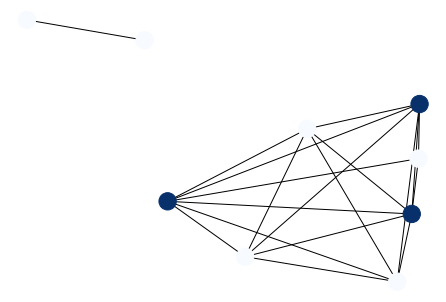

In [58]:
pos = nx.spring_layout(g, k=1, iterations=5)
max_c = max(centralidade_betweenness.values())
color_map = {x[0]:x[1]/max_c for x in centralidade_betweenness.items()}
nx.draw(g, pos, node_color=list(color_map.values()), cmap=plt.cm.Blues)
plt.show()

### Para visualizar no Gephi:

In [59]:
nx.write_graphml(g, 'users_groups.graphml')